* The **Churn dataset** is typically used in the context of customer retention and churn analysis. "Churn" refers to the phenomenon where `customers stop doing business with a company or service`. Understanding churn is crucial for businesses as retaining existing customers is often more cost-effective than acquiring new ones.

#### Importance of Churn Analysis
* Churn analysis is vital for businesses because it helps them:

1. **Identify At-Risk Customers**: By predicting which customers are likely to churn, businesses can take proactive measures to retain them.
2. **Improve Customer Retention**: Understanding the reasons behind churn helps in designing better customer retention strategies.
3. **Optimize Marketing Efforts**: Targeting marketing efforts towards at-risk customers can be more cost-effective.
4. **Enhance Customer Satisfaction**: By addressing the issues that lead to churn, businesses can improve overall customer satisfaction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\A\OneDrive\Desktop\intellipaat 13-01-24\intellipaat\jupyter notebook\CSV FIles\customer_churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# totalCharges are numeric it should not be object

In [8]:
# correct the datatype of total Charges column

df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')

# the data will convert to numeric either in integer or float
# we use errors = 'coerce' it means if it get any error then it convert to Nan value
# churn_data['TotalCharges'] = churn_data['TotalCharges'].astype(float)
# if we want to use astype to convert then before performing we have to use replace function and fill the blank values into some numeric value

In [9]:
df.TotalCharges.dtype

dtype('float64')

In [10]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df.dropna(inplace = True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

* Churn is the target variable

* We don't need customerID in training or testing

In [14]:
df.drop(columns = ['customerID'], inplace = True)

### Visualizing the data

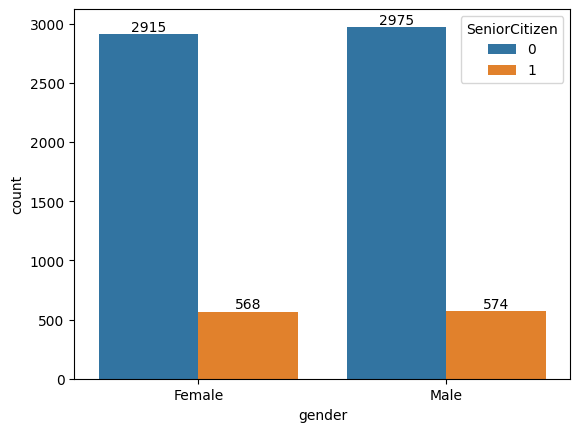

In [15]:
plots = sns.countplot(x = 'gender', hue = 'SeniorCitizen', data = df)
for plot in plots.containers:
    plots.bar_label(plot)

In [16]:
df.Contract.value_counts().index

Index(['Month-to-month', 'Two year', 'One year'], dtype='object', name='Contract')

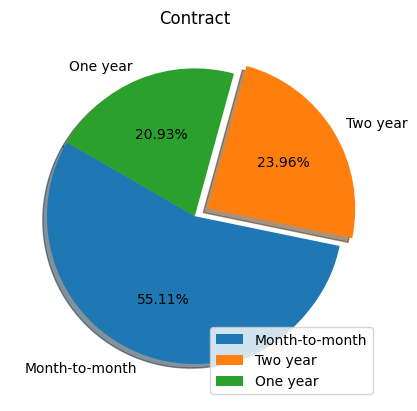

In [17]:
explode = (0, 0.1, 0)
plt.pie(x = df.Contract.value_counts(), autopct = '%.2f%%', shadow = True, labels = df.Contract.value_counts().index, explode = explode, startangle = 150)
plt.legend(loc = 'lower right')
plt.title('Contract')
plt.show()

In [18]:
cvar = []
for i in df.columns:
    if(df[i].dtypes == 'object'):
        cvar.append(i)

In [19]:
print(cvar)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [20]:
for i in cvar:
    print(df[i].value_counts())
    print()

gender
Male      3549
Female    3483
Name: count, dtype: int64

Partner
No     3639
Yes    3393
Name: count, dtype: int64

Dependents
No     4933
Yes    2099
Name: count, dtype: int64

PhoneService
Yes    6352
No      680
Name: count, dtype: int64

MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64

DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64

TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64

StreamingTV
No                 

In [21]:
len(cvar) # so we can plot pie with 8x2 subplots

16

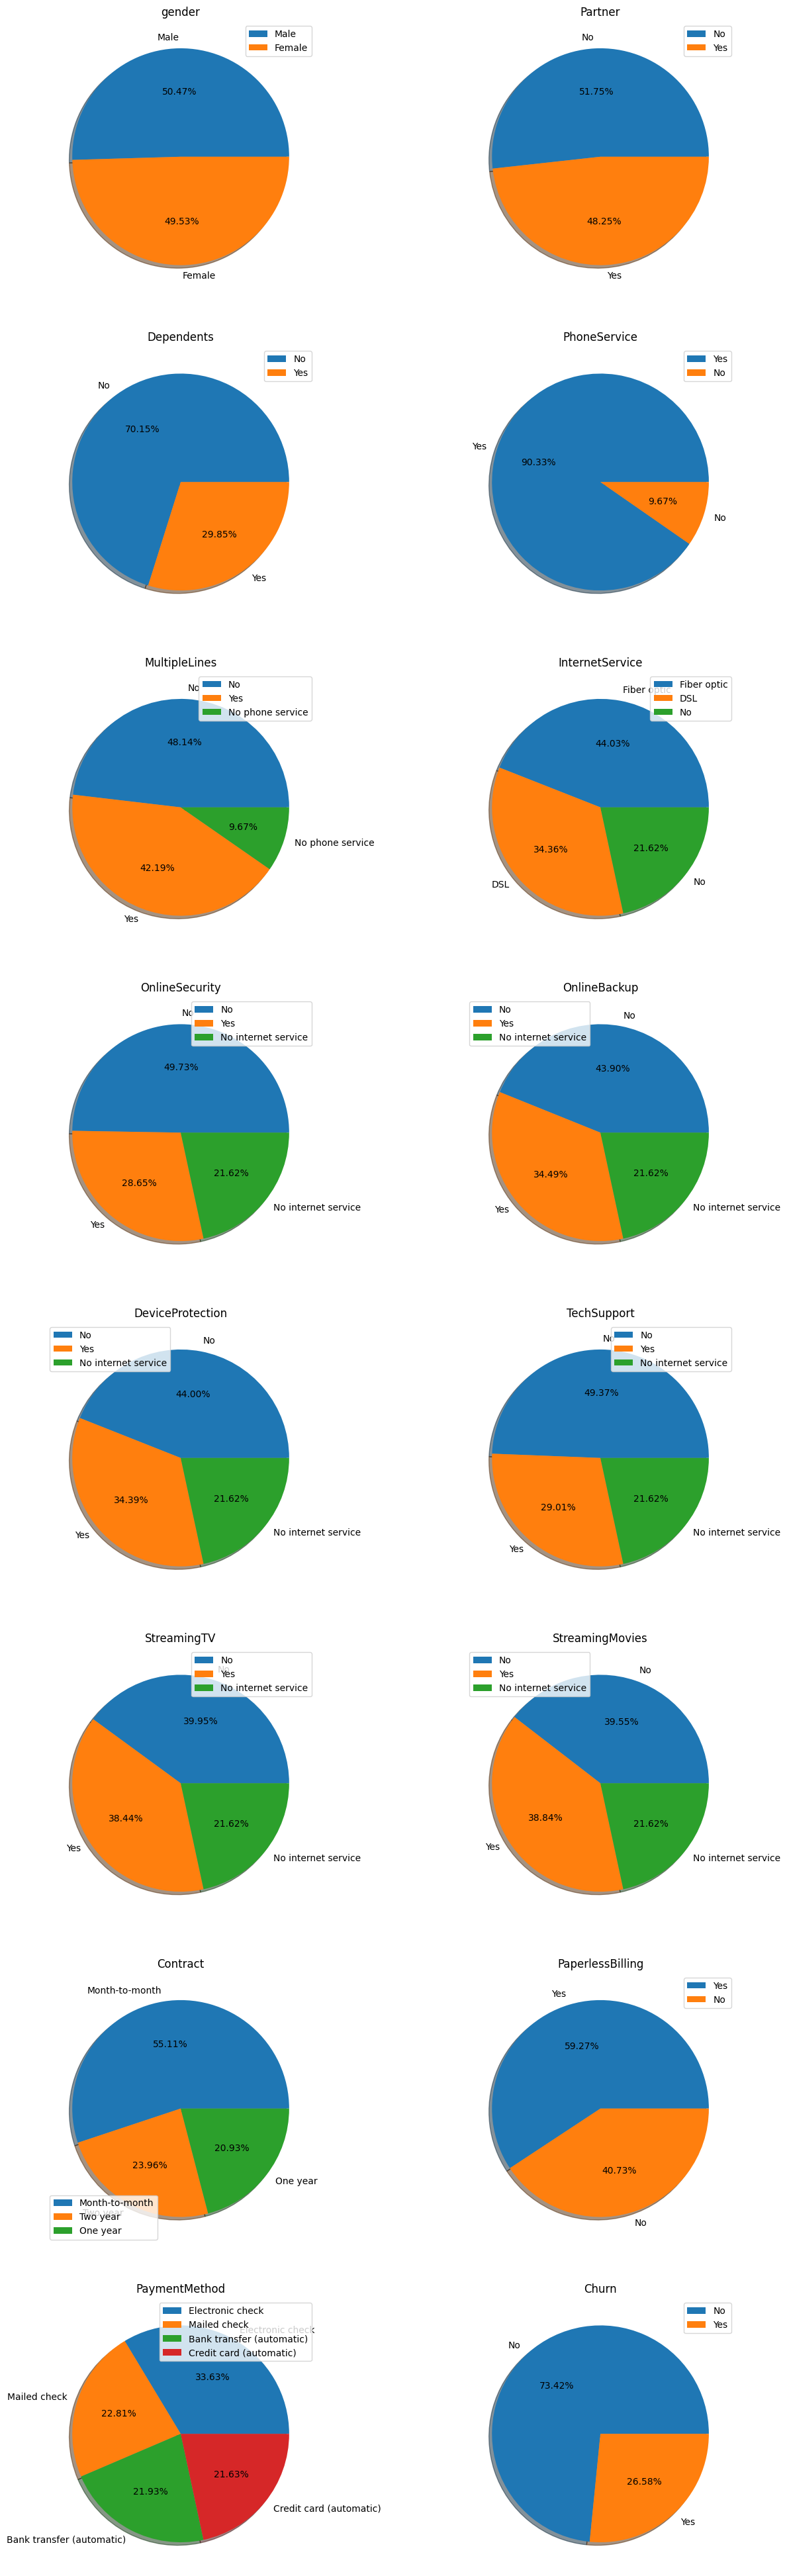

In [22]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(8, 2, figsize=(15, 50))
for i, col in enumerate(cvar):
    ax = axes[i//2, i%2]
    ax.pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct='%.2f%%', shadow=True)
    ax.legend(loc='best')
    ax.set_title(col)

# plt.tight_layout()
plt.show()


* **i//2 gives the row index.**
* **i%2 gives the column index.**

* When i is 0, i//2 is 0 (first row), and i%2 is 0 (first column), so axes[0, 0].
* When i is 1, i//2 is 0 (first row), and i%2 is 1 (second column), so axes[0, 1].
* When i is 2, i//2 is 1 (second row), and i%2 is 0 (first column), so axes[1, 0].

In [23]:
df_c = df.copy()

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
for i in df_c.columns:
    if(df_c[i].dtypes == 'object'):
        df_c[i] = le.fit_transform(df_c[i])

In [26]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int32  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int32  
 16  PaymentMethod     7032 non-null   int32  
 17  

<Axes: >

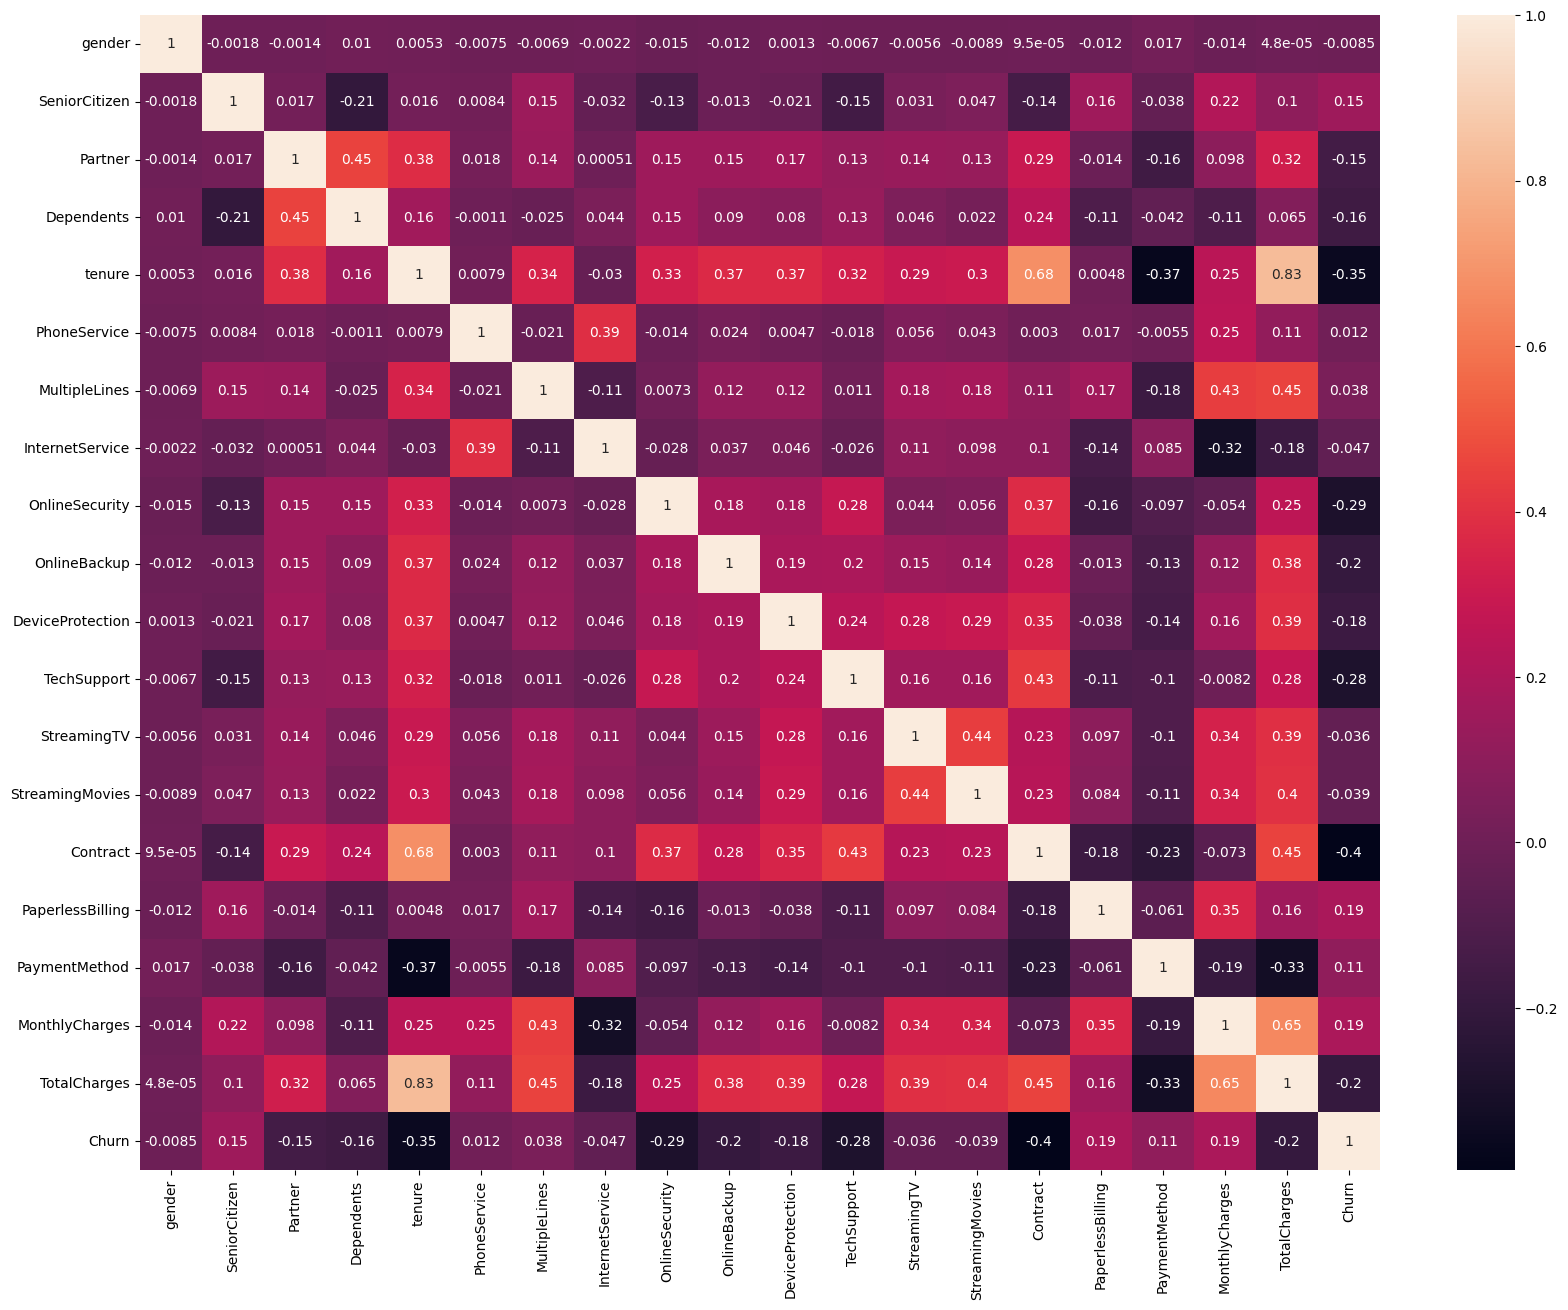

In [27]:
plt.figure(figsize = (20, 15))
sns.heatmap(df_c.corr(numeric_only = True), annot = True)

In [28]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:
cols = ['gender', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [30]:
len(cols)

16

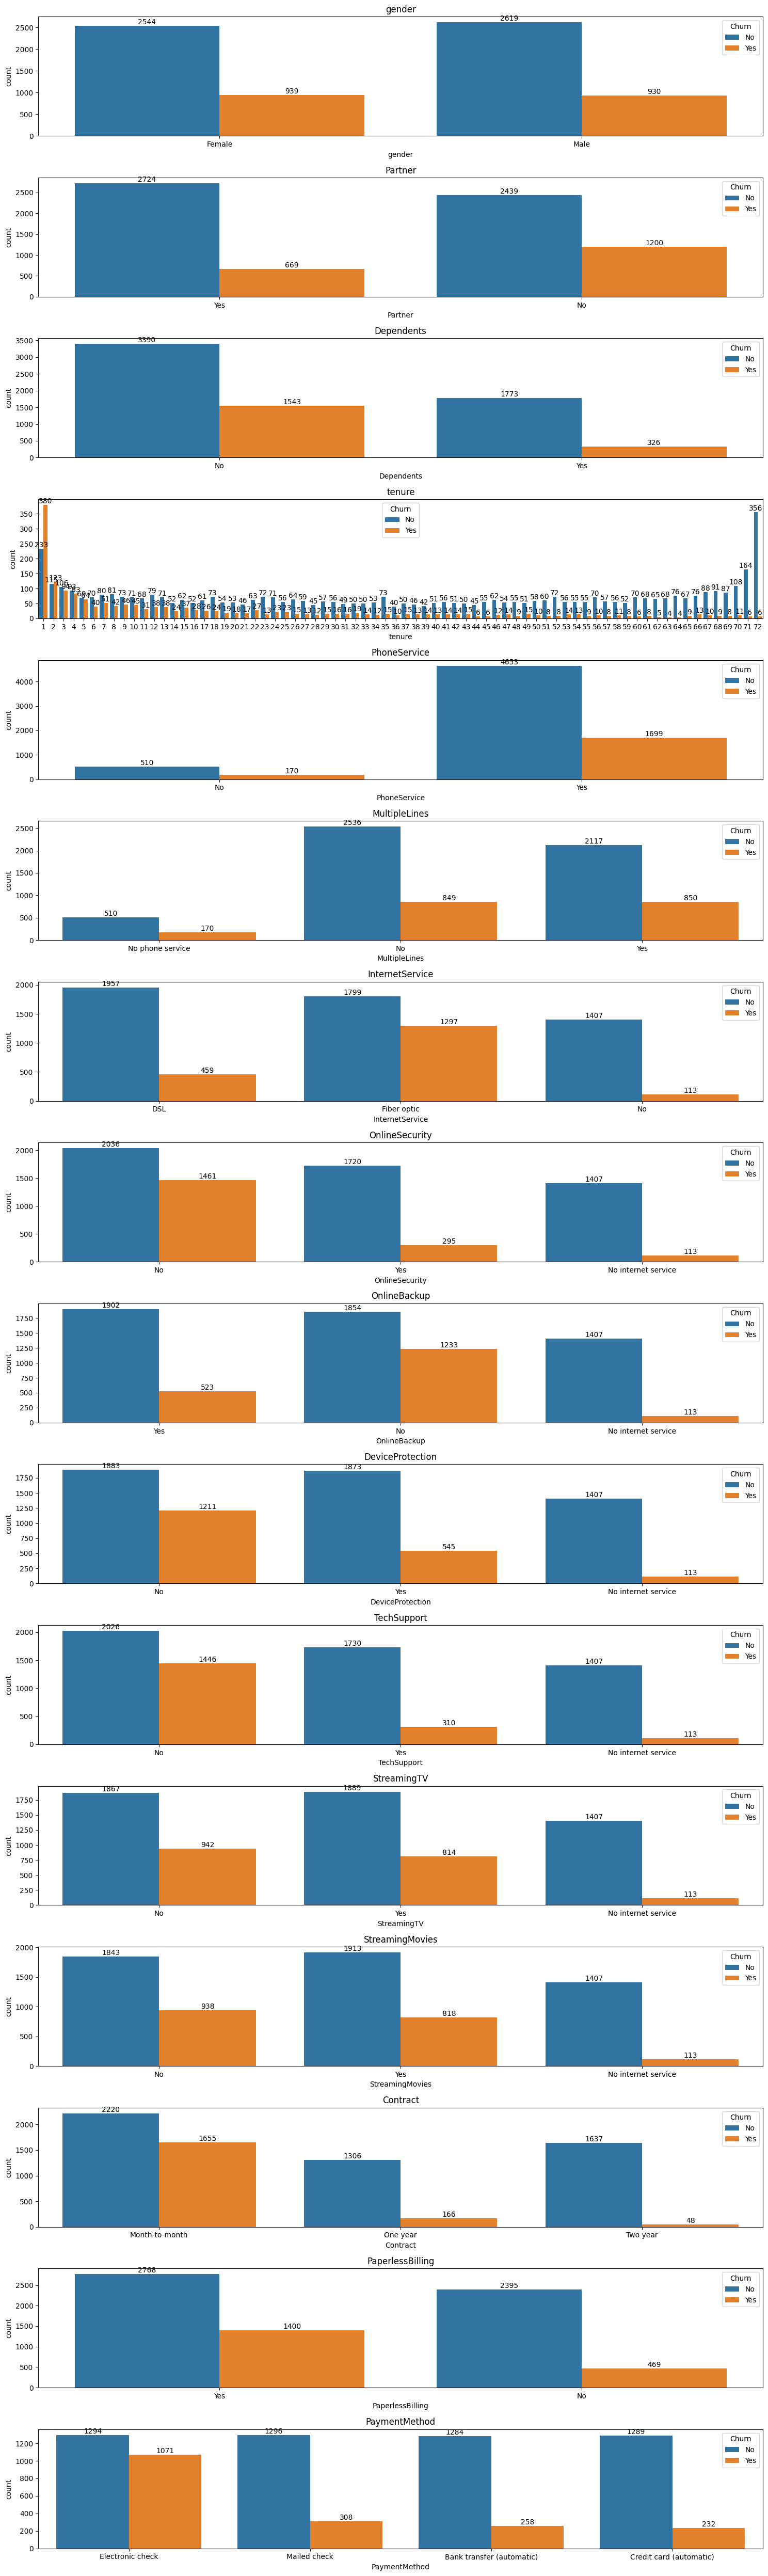

In [31]:
fig, axes = plt.subplots(16, 1, figsize = (15, 50))

for i, col in enumerate(cols):
    ax = axes[i]
    plots = sns.countplot(x = col, data = df, hue = 'Churn', ax = ax)
    for plot in plots.containers:
        plots.bar_label(plot)
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [32]:
# sns.pairplot(data = df_c, hue = 'Churn', kind = 'scatter', markers = ['o', 's'])

In [33]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

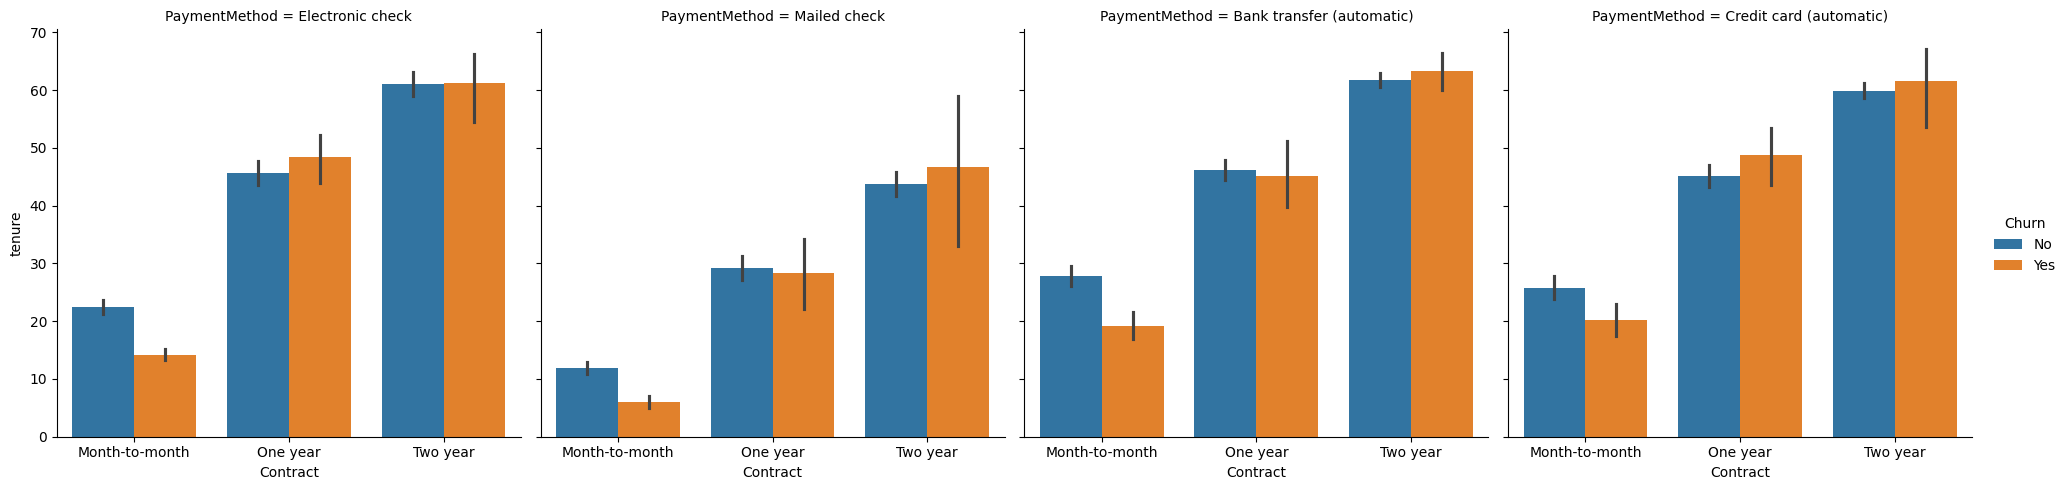

In [34]:
sns.catplot(x = 'Contract', y = 'tenure',  data = df, hue = 'Churn', col = 'PaymentMethod', kind = 'bar')

In [35]:
ncol = []
for i in df.columns:
    if(df[i].dtype != 'object'):
        ncol.append(i)

ncol

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [36]:
ncol.remove('SeniorCitizen')

In [37]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

C:\Users\A\AppData\Local\Temp\ipykernel_3120\3405536940.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], bins = 10)


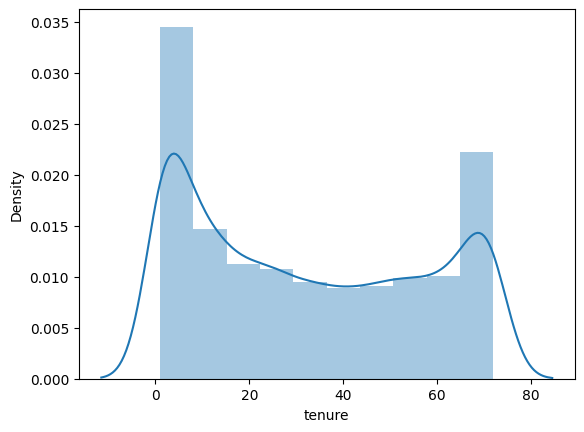

C:\Users\A\AppData\Local\Temp\ipykernel_3120\3405536940.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], bins = 10)


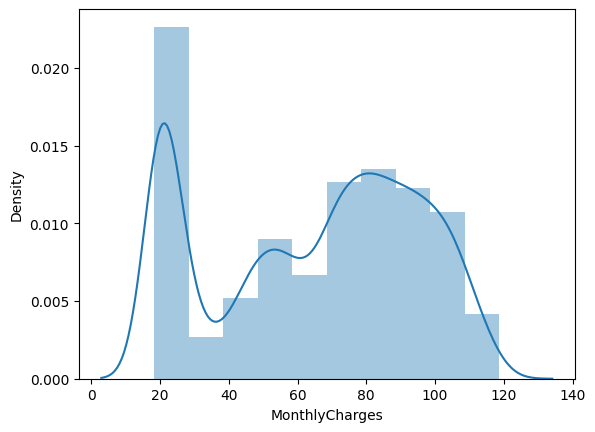

C:\Users\A\AppData\Local\Temp\ipykernel_3120\3405536940.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], bins = 10)


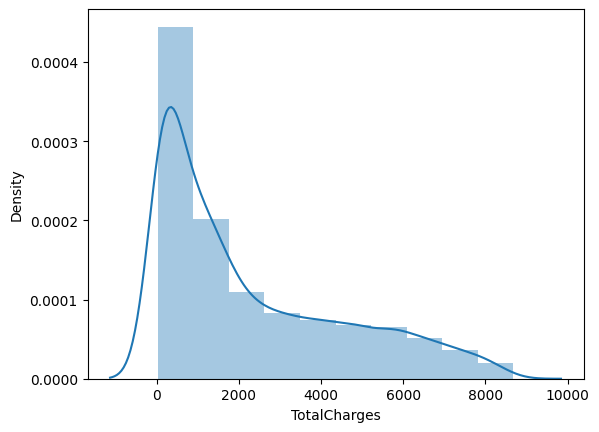

In [38]:
for i in ncol:
    sns.distplot(df[i], bins = 10)
    plt.show()

In [39]:
df_c

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [41]:
x = df_c.iloc[: , :-1]
y = df_c.iloc[:, -1]

In [42]:
x_sc = sc.fit_transform(x)
x_sc = pd.DataFrame(x_sc, columns = x.columns)
x_sc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009430,-0.440327,1.035617,-0.652305,-1.280248,-3.056334,0.062666,-1.183614,-0.917837,1.242875,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,0.399805,-1.161694,-0.994194
1,0.990658,-0.440327,-0.965608,-0.652305,0.064303,0.327189,-0.991564,-1.183614,1.408012,-1.028998,1.245441,-0.924267,-1.112632,-1.121501,0.373926,-1.206361,1.336636,-0.260878,-0.173740
2,0.990658,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.991564,-1.183614,1.408012,1.242875,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,1.336636,-0.363923,-0.959649
3,0.990658,-0.440327,-0.965608,-0.652305,0.512486,-3.056334,0.062666,-1.183614,1.408012,-1.028998,1.245441,1.396963,-1.112632,-1.121501,0.373926,-1.206361,-1.473857,-0.747850,-0.195248
4,-1.009430,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.991564,0.172835,-0.917837,-1.028998,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,0.399805,0.196178,-0.940457


* we have less columns so we will do **Feature Selection** to remove the columns which have high multicollinearity

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
while True:
    vif_data = pd.DataFrame()
    vif_data['Features'] = x_sc.columns
    vif_data['Variance Inflation Factor'] = [variance_inflation_factor(x_sc.values, i) for i in range(len(x_sc.columns))]
    print(vif_data)
    
    if(len(x_sc.columns) >= 7):
        if(vif_data['Variance Inflation Factor'].max() >= 10):
            index = vif_data['Variance Inflation Factor'].idxmax()
            print("\n", vif_data.iloc[index])
            feature = vif_data.iloc[index, 0]
            print(feature,"\n")
            x_sc.drop(columns = feature, axis = 1, inplace = True)
        else:
            break
    else:
        break

            Features  Variance Inflation Factor
0             gender                   1.001876
1      SeniorCitizen                   1.149648
2            Partner                   1.461171
3         Dependents                   1.379721
4             tenure                   7.493654
5       PhoneService                   1.622695
6      MultipleLines                   1.395898
7    InternetService                   1.824359
8     OnlineSecurity                   1.268758
9       OnlineBackup                   1.219068
10  DeviceProtection                   1.297942
11       TechSupport                   1.321878
12       StreamingTV                   1.446947
13   StreamingMovies                   1.447896
14          Contract                   2.493335
15  PaperlessBilling                   1.202566
16     PaymentMethod                   1.186112
17    MonthlyCharges                   4.967861
18      TotalCharges                  10.618697

 Features                     TotalChar

In [45]:
x_sc.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges'],
      dtype='object')

In [46]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

* data is imbalance so we will do **oversampling or undersampling** to make the model more accurate
* we do oversampling if the data is less and viseversa

In [47]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 0)

In [48]:
x_sc, y = smote.fit_resample(x_sc, y)

In [49]:
y.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [51]:
lda = LinearDiscriminantAnalysis(n_components = 1)

In [52]:
x = lda.fit_transform(x_sc, y)

In [53]:
x

array([[-0.94284918],
       [ 1.27354158],
       [-0.07041219],
       ...,
       [ 0.16102156],
       [ 0.01382015],
       [-1.73742083]])

In [54]:
import pycaret

In [55]:
from pycaret.classification import *

In [56]:
clf_setup = setup(df, target = 'Churn')

,Description,Value
0,Session id,8071
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7032, 20)"
5,Transformed data shape,"(7032, 41)"
6,Transformed train set shape,"(4922, 41)"
7,Transformed test set shape,"(2110, 41)"
8,Numeric features,4
9,Categorical features,15


In [57]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8041,0.8459,0.8041,0.7964,0.7985,0.4717,0.4751,1.5580
ada,Ada Boost Classifier,0.8023,0.8439,0.8023,0.7933,0.7949,0.4598,0.4651,0.4000
gbc,Gradient Boosting Classifier,0.8015,0.8441,0.8015,0.7917,0.7936,0.4553,0.4608,0.6270
ridge,Ridge Classifier,0.7982,0.8376,0.7982,0.7880,0.7899,0.4454,0.4511,0.2030
lda,Linear Discriminant Analysis,0.7982,0.8376,0.7982,0.7917,0.7939,0.4624,0.4643,0.1890
lightgbm,Light Gradient Boosting Machine,0.7893,0.8342,0.7893,0.7804,0.7828,0.4300,0.4337,0.4290
rf,Random Forest Classifier,0.7889,0.8252,0.7889,0.7785,0.7811,0.4232,0.4277,0.4850
xgboost,Extreme Gradient Boosting,0.7865,0.8243,0.7865,0.7775,0.7798,0.4223,0.4260,0.7780
et,Extra Trees Classifier,0.7733,0.8005,0.7733,0.7610,0.7641,0.3775,0.3825,0.4140
knn,K Neighbors Classifier,0.7725,0.7552,0.7725,0.7606,0.7640,0.3781,0.3822,0.2660


* **Logistic Regression** showing the Highest Accuracy

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [59]:
x_train.shape

(8260, 1)

In [60]:
x_test.shape

(2066, 1)

In [61]:
y_train.value_counts()

Churn
0    4157
1    4103
Name: count, dtype: int64

In [62]:
y_test.value_counts()

Churn
1    1060
0    1006
Name: count, dtype: int64

### Model Building

In [63]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [64]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
from pprint import pprint
y_predict = lr.predict(x_test)
pprint(y_predict)

array([0, 0, 1, ..., 1, 1, 0])


### Model Evaluation

In [66]:
from sklearn.metrics import *

In [67]:
lr.score(x_test, y_test)

0.7899322362052275

In [68]:
accuracy = accuracy_score(y_predict, y_test)
accuracy

0.7899322362052275

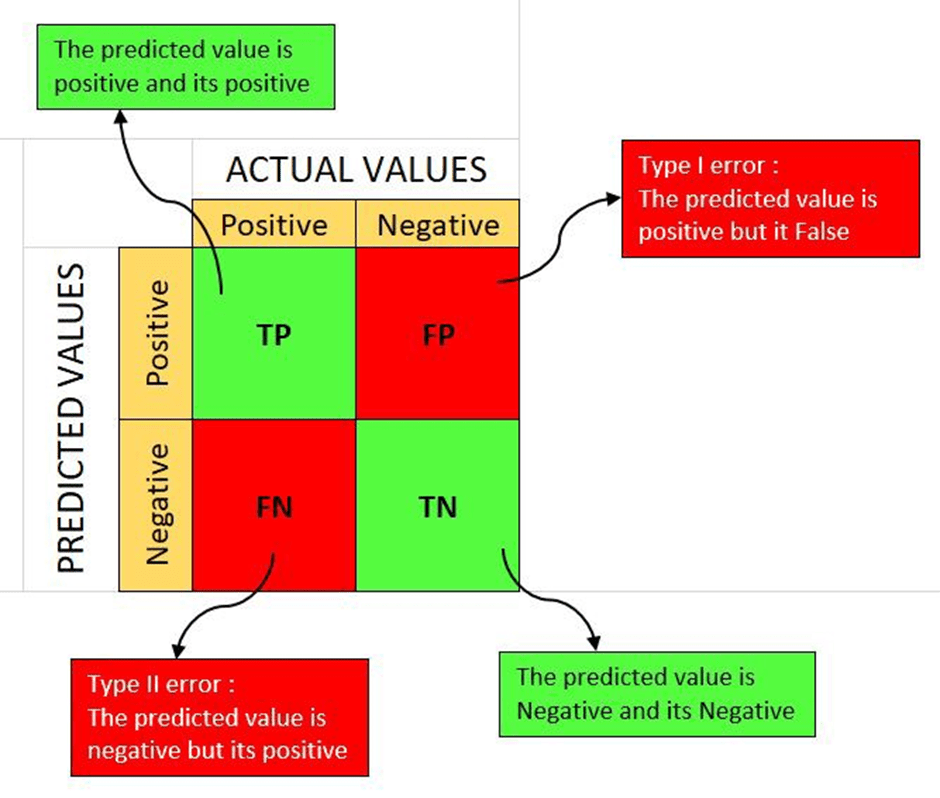

In [69]:
cn = confusion_matrix(y_predict, y_test)
cn

array([[769, 197],
       [237, 863]], dtype=int64)

In [70]:
tp, fp, fn, tn = confusion_matrix(y_predict, y_test).ravel()

In [71]:
print(f"The total values given testing for the model is {tp+fp+fn+tn}")

The total values given testing for the model is 2066


In [72]:
print(f"The total values the model predicted correctly is {tp+tn}")
print(f"The total values the model predicted wrongly is {fp+fn}")

The total values the model predicted correctly is 1632
The total values the model predicted wrongly is 434


In [73]:
print(f"The total actual positive values in the testing is {tp+fn}")
print(f"The total actual negative values in the testing is {tn+fp}")

The total actual positive values in the testing is 1006
The total actual negative values in the testing is 1060


In [74]:
print(f"Out of {tp+fn} actual Postive values the model predicted {tp} correctly")
print(f"Out of {tn+fp} actual Negative values the model predicted {tn} correctly")

Out of 1006 actual Postive values the model predicted 769 correctly
Out of 1060 actual Negative values the model predicted 863 correctly


In [75]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       966
           1       0.81      0.78      0.80      1100

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



we need to perform hyperparameter tuning to get the model accurate

In [76]:
from sklearn.model_selection import cross_val_score

In [78]:
cv = cross_val_score(lr, x_train, y_train, cv = 5, scoring = 'accuracy')
cv

array([0.78087167, 0.76937046, 0.76815981, 0.76271186, 0.76452785])

In [83]:
print(f'Cross-Validation Accuracy Scores: {cv}')
print(f'Mean Cross-Validation Accuracy: {cv.mean():.2f}')

Cross-Validation Accuracy Scores: [0.78087167 0.76937046 0.76815981 0.76271186 0.76452785]
Mean Cross-Validation Accuracy: 0.77


In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],        # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],  # Solver
    'max_iter': [100, 200, 300]          # Number of iterations
}

In [87]:
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

In [90]:
grid_search

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [92]:
best_model = grid_search.best_estimator_
best_model

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
best_model.fit(x_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
y_predict = best_model.predict(x_test)
y_predict

array([0, 0, 1, ..., 1, 1, 0])

In [95]:
best_model.score(x_test, y_test)

0.7899322362052275

In [97]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       966
           1       0.81      0.78      0.80      1100

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066

